In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

In [5]:
## Step 1: Load the basic data

start_date = '2020-01-01'
end_date = '2024-01-01'

print(f"Loading data from {start_date} to {end_date}")

# Load ETF data using yfinance
tickers = ['SPY', 'EEM', 'GLD']
etf_raw = yf.download(tickers, start=start_date, end=end_date)

# Extract Close prices 
etf_data = etf_raw['Close']

# Load VIX data (single ticker)
vix_raw = yf.download('^VIX', start=start_date, end=end_date)
vix_data = vix_raw['Close']

# Load DXY (US Dollar Index)  
dxy_raw = yf.download('DX-Y.NYB', start=start_date, end=end_date)
dxy_data = dxy_raw['Close']

print("Data loaded!")
print(f"ETF data shape: {etf_data.shape}")
print(f"VIX data shape: {vix_data.shape}")
print(f"DXY data shape: {dxy_data.shape}")

Loading data from 2020-01-01 to 2024-01-01


[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Data loaded!
ETF data shape: (1006, 3)
VIX data shape: (1006, 1)
DXY data shape: (1006, 1)


In [6]:
print(etf_data.head())

print(vix_data.head())

print(dxy_data.head())

Ticker            EEM         GLD         SPY
Date                                         
2020-01-02  40.660732  143.949997  299.406494
2020-01-03  39.905777  145.860001  297.139343
2020-01-06  39.808083  147.389999  298.272888
2020-01-07  39.781433  147.970001  297.434174
2020-01-08  40.012360  146.860001  299.019379
Ticker       ^VIX
Date             
2020-01-02  12.47
2020-01-03  14.02
2020-01-06  13.85
2020-01-07  13.79
2020-01-08  13.45
Ticker       DX-Y.NYB
Date                 
2020-01-02  96.849998
2020-01-03  96.839996
2020-01-06  96.669998
2020-01-07  96.980003
2020-01-08  97.300003


In [7]:
## Step 3: Combine everything into one DataFrame
# Create main dataset
df = pd.DataFrame(index=etf_data.index)
df['SPY'] = etf_data['SPY']
df['EEM'] = etf_data['EEM'] 
df['GLD'] = etf_data['GLD']
df['VIX'] = vix_data
df['DXY'] = dxy_data

print(f"Shape: {df.shape}")
print(f"Date range: {df.index.min()} to {df.index.max()}")

print(df.head())
print(df.tail())

Shape: (1006, 5)
Date range: 2020-01-02 00:00:00 to 2023-12-29 00:00:00
                   SPY        EEM         GLD    VIX        DXY
Date                                                           
2020-01-02  299.406494  40.660732  143.949997  12.47  96.849998
2020-01-03  297.139343  39.905777  145.860001  14.02  96.839996
2020-01-06  298.272888  39.808083  147.389999  13.85  96.669998
2020-01-07  297.434174  39.781433  147.970001  13.79  96.980003
2020-01-08  299.019379  40.012360  146.860001  13.45  97.300003
                   SPY        EEM         GLD    VIX         DXY
Date                                                            
2023-12-22  464.874420  38.091644  190.270004  13.03  101.699997
2023-12-26  466.837341  38.391499  191.720001  12.99  101.470001
2023-12-27  467.681427  38.613972  192.589996  12.43  100.989998
2023-12-28  467.858093  38.913834  191.470001  12.47  101.230003
2023-12-29  466.503662  38.894489  191.169998  12.45  101.330002


In [8]:
## Step 4: Check for missing data

missing_data = df.isnull().sum()
print(missing_data)

if missing_data.sum() > 0:
    print(f"\nTotal missing values: {missing_data.sum()}")
else:
    print("No missing data")

SPY    0
EEM    0
GLD    0
VIX    0
DXY    0
dtype: int64
No missing data


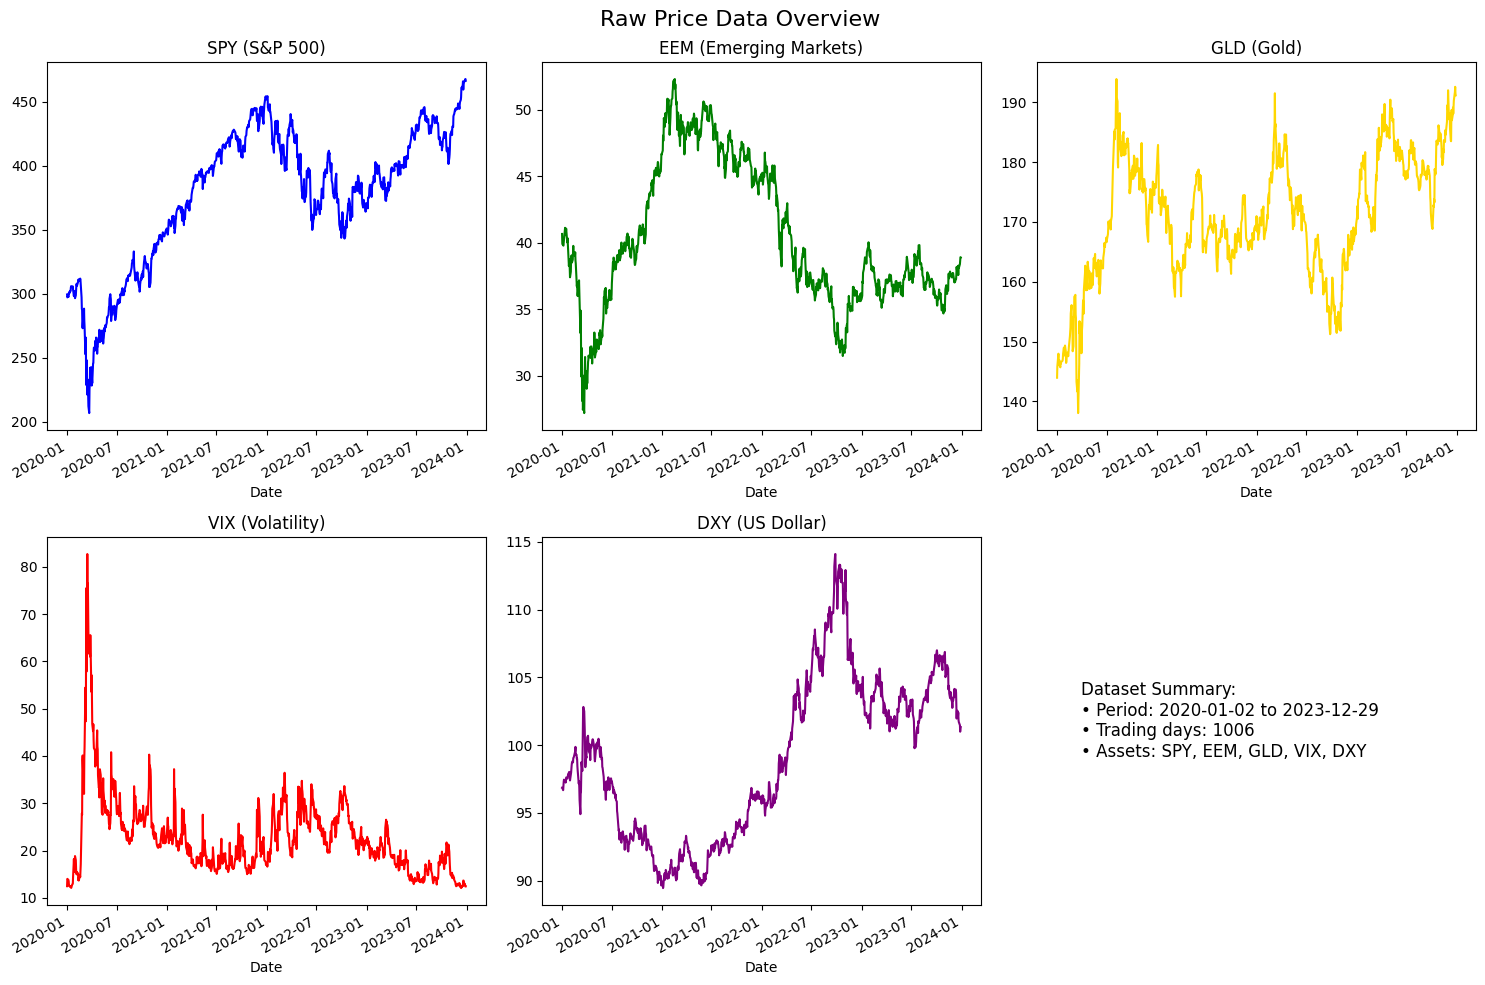

In [10]:
## Step 5: Basic plots to see what our data looks like
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Raw Price Data Overview', fontsize=16)

# Plot each asset
df['SPY'].plot(ax=axes[0,0], title='SPY (S&P 500)', color='blue')
df['EEM'].plot(ax=axes[0,1], title='EEM (Emerging Markets)', color='green')
df['GLD'].plot(ax=axes[0,2], title='GLD (Gold)', color='gold')
df['VIX'].plot(ax=axes[1,0], title='VIX (Volatility)', color='red')
df['DXY'].plot(ax=axes[1,1], title='DXY (US Dollar)', color='purple')

# Leave one subplot for summary stats
axes[1,2].axis('off')
stats_text = f"""
Dataset Summary:
• Period: {df.index.min().strftime('%Y-%m-%d')} to {df.index.max().strftime('%Y-%m-%d')}
• Trading days: {len(df)}
• Assets: SPY, EEM, GLD, VIX, DXY
"""
axes[1,2].text(0.1, 0.5, stats_text, fontsize=12, verticalalignment='center')

plt.tight_layout()
plt.show()

In [11]:
## Step 6: Calculate simple daily returns

returns_df = df.copy()
for col in ['SPY', 'EEM', 'GLD', 'DXY']:
    returns_df[f'{col}_return'] = df[col].pct_change()

# Keep VIX as level (not return)
returns_df = returns_df.drop(['SPY', 'EEM', 'GLD', 'DXY'], axis=1)

print(returns_df.head())

              VIX  SPY_return  EEM_return  GLD_return  DXY_return
Date                                                             
2020-01-02  12.47         NaN         NaN         NaN         NaN
2020-01-03  14.02   -0.007572   -0.018567    0.013269   -0.000103
2020-01-06  13.85    0.003815   -0.002448    0.010490   -0.001755
2020-01-07  13.79   -0.002812   -0.000669    0.003935    0.003207
2020-01-08  13.45    0.005330    0.005805   -0.007502    0.003300


In [12]:
## Step 7: Basic stats

stats = returns_df.describe()
print(stats.round(4))

             VIX  SPY_return  EEM_return  GLD_return  DXY_return
count  1006.0000   1005.0000   1005.0000   1005.0000   1005.0000
mean     22.8659      0.0005      0.0001      0.0003      0.0001
std       8.4843      0.0143      0.0150      0.0099      0.0046
min      12.0700     -0.1094     -0.1248     -0.0537     -0.0212
25%      17.2800     -0.0057     -0.0073     -0.0048     -0.0025
50%      21.3900      0.0008      0.0003      0.0005      0.0000
75%      26.2925      0.0076      0.0080      0.0057      0.0028
max      82.6900      0.0906      0.0805      0.0485      0.0165
